<a href="https://colab.research.google.com/github/sumitsaxena-git/ai-bootcamp/blob/main/Fake_News_Identifier_with_Basic_Tools_Modern_AI_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern AI Pro: Identifying real and fake news

This is part of a ML course from *Invento Robotics*. We will cover the following:
1. Pandas
2. Scikit-learn
3. Gradio

Let's create a simple Machine Learning app that detects fake news with some accuracy and deploy it to the world.

Data from: https://www.kaggle.com/datasets/balajiviswanathan83/fake-news-dataset
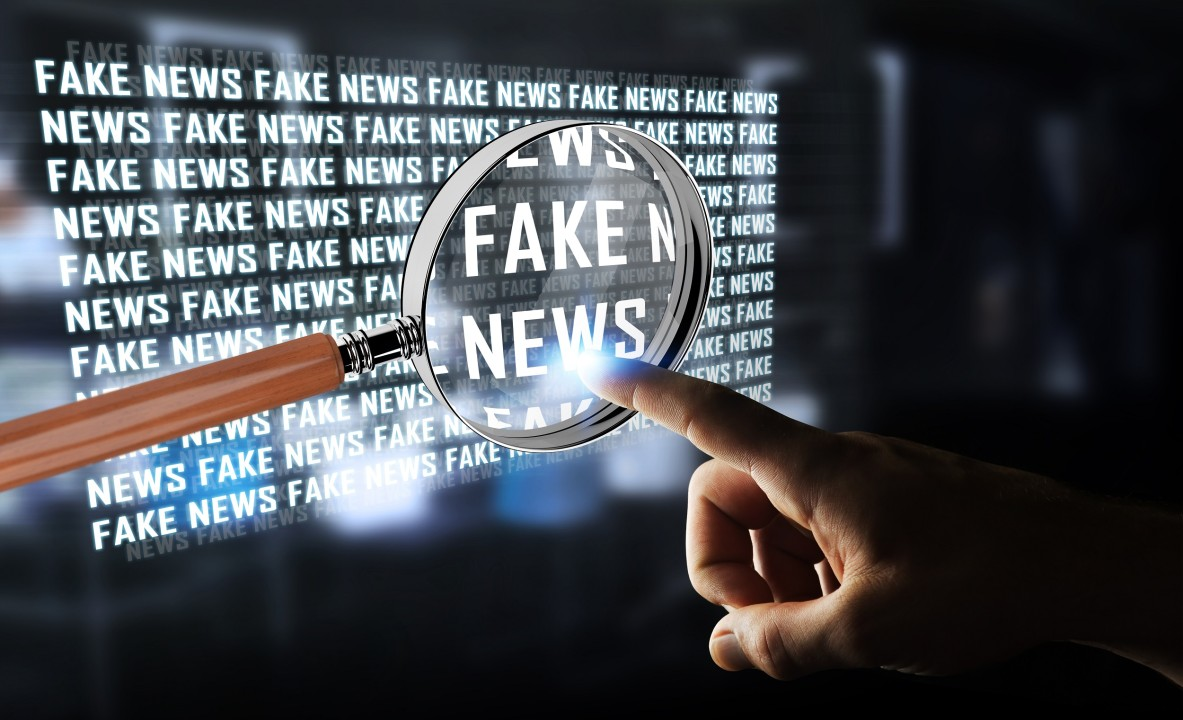










## Step 1: Download the data from Kaggle and load into the datafame
Refer to earlier lectures if you have questions on this part.

In [ ]:
from google.colab import userdata
from os import environ

environ["KAGGLE_KEY"]      = userdata.get('KAGGLE_KEY')
environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

! pip -q install kaggle
! kaggle datasets download -d balajiviswanathan83/fake-news-dataset
! unzip /content/fake-news-dataset.zip

  0% 0.00/1.86M [00:00<?, ?B/s]
100% 1.86M/1.86M [00:00<00:00, 136MB/s]
Archive:  /content/fake-news-dataset.zip
  inflating: true_fake_news.csv      


In [ ]:
import pandas as pd
df = pd.read_csv("true_fake_news.csv")
df

,Unnamed: 0,title,text,subject,date,Is Fake
0,5820,NH Car Dealer Gives Away Free AR-15s With Car...,Mike Hagan has a used car dealership and repai...,News,"June 18, 2016",1
1,22179,EP #16: Patrick Henningsen LIVE – ‘Official Wa...,Join Patrick every Wednesday at Independent Ta...,US_News,"March 9, 2017",1
2,18482,WOW! ALEX JONES Releases Secretly Recorded Int...,Alex Jones scooped NBC and Megyn Kelly with a ...,left-news,"Jun 15, 2017",1
3,13991,SAY GOOD BYE TO LONDON: Radical Muslim WINS Lo...,Has the entire world gone mad with political c...,politics,"May 3, 2016",1
4,16629,INFAMOUS ROMANIAN HACKER Tells FOX News Host H...,"Of course, America s favorite criminal candida...",Government News,"May 4, 2016",1
...,...,...,...,...,...,...
1995,5521,"Trump blasts retailer Nordstrom, raising new c...",WASHINGTON/CHICAGO (Reuters) - (This February ...,politicsNews,"February 8, 2017",0
1996,14241,China urges Thailand to find Muslim Uighurs qu...,BEIJING (Reuters) - China said on Tuesday it h...,worldnews,"November 21, 2017",0
1997,16872,Spain plans new elections in Catalonia to end ...,MADRID (Reuters) - The Spanish government has ...,worldnews,"October 20, 2017",0
1998,818,House Speaker Ryan says special counsel should...,WASHINGTON (Reuters) - U.S. House Speaker Paul...,politicsNews,"November 5, 2017",0


## Step 2: Basic Machine Learning
In Supervised Machine Learning problems, we separate an input from the output. Input is what you supply and output is what the machine learns to return. During the training phase you supply both input and output data.

Our problem becomes -- given a text input can you predict if the news is fake or real?

In [ ]:
y = df["Is Fake"] # This is a array created from one column that we are looking to predict in the future.
X = df["text"] # We will just use the text for this exercise

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=3)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english', max_df=0.7)

X_vec_train=tfidf.fit_transform(X_train)
X_vec_test=tfidf.transform(X_test)
print(X_vec_train)

  (0, 17999)	0.04446626172473335
  (0, 23574)	0.028154440793990106
  (0, 26298)	0.03803297567303265
  (0, 19600)	0.02599719503500129
  (0, 5812)	0.024526055096156886
  (0, 23332)	0.020152635528164594
  (0, 18688)	0.022278548662619756
  (0, 20705)	0.04304717809241953
  (0, 27137)	0.01848145475623963
  (0, 16309)	0.018297108227399096
  (0, 1627)	0.025257839642549528
  (0, 6277)	0.02104666784032568
  (0, 21001)	0.03392074379113289
  (0, 10318)	0.03526456607242283
  (0, 7691)	0.03209122679222313
  (0, 3284)	0.04887433810840633
  (0, 3122)	0.03490106657153394
  (0, 13357)	0.029512667407459912
  (0, 25752)	0.04629577872364311
  (0, 4416)	0.03423102532507358
  (0, 21872)	0.03455722554051396
  (0, 6062)	0.028154440793990106
  (0, 1643)	0.024255396805278218
  (0, 19768)	0.029822948941400595
  (0, 20201)	0.024321989140854185
  :	:
  (1599, 14463)	0.07875498048020405
  (1599, 2619)	0.10032339634035946
  (1599, 24806)	0.19273097800314462
  (1599, 24854)	0.07269502220849923
  (1599, 23625)	0.099482

In [ ]:
temp_df = pd.DataFrame(X_vec_train.toarray(), columns=tfidf.get_feature_names_out())
temp_df

,00,000,0000,000270,00106,00193,005,005380,00am,01,...,zucker,zuckerberg,zuckermann,zuhdi,zukunfteuropaa,zulkarnain,zuma,zurchin,zurich,zwickau
0,0.0,0.039049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1596,0.0,0.039867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1597,0.0,0.020203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will use a ML algorithm called the Passive Aggressive Classifier (we won't get into the details now, but we will talk about it in the following lectures) to train a machine.

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_vec_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

## Step 3: Testing Accuracy.

That is all baby. We have trained our simple ML algorithm. Is it magic or what? We will soon see.

In [ ]:
accuracy = model.score(X_vec_test, y_test)
print("The test accuracy is",accuracy)

The test accuracy is 0.9825


In [ ]:
#We will create a new function for prediction.
def predict_news(news_text):
  prediction = model.predict(tfidf.transform([news_text]))
  if prediction[0] == 1:
    return "Possibly fake news"
  else:
    return "Possibly real news"


text = 'NH Car Dealer Gives Away Free AR-15s With Car Purchases – Gun Nuts Sickeningly Rejoice'
print(predict_news(text))

text = 'Donald Trump got elected as a President'
print(predict_news(text))

Possibly fake news
Possibly fake news


In [ ]:
!pip install -q gradio
import gradio as gr
gr.Interface(predict_news, "text", "text").launch(share=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.1 MB/s et

In [ ]:
#Optional: Save the model now: If you want to use this later
import pickle

with open('tfidf.pickle', 'wb') as f:
    pickle.dump(tfidf, f, pickle.HIGHEST_PROTOCOL)

with open('model.pkl','wb') as f:
    pickle.dump(model,f)

## Step 4: Bring the LLM
You can also use any other LLM. Refer to our other notebooks for samples.

In [ ]:
!pip install git+https://gitlab.com/gauthammsam/mitrallm.git --quiet
from google.colab import userdata
from mitrallm import MitraLLM
llm = MitraLLM(
    token     = userdata.get("MITRA_TOKEN"),
    accessapi = userdata.get("MITRA_ENDPOINT")
)
print(llm)


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.0/817.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.3/291.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.2/115.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.7.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
weasel 0.3.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
MitraLLM
Params: {

In [ ]:
fake_news_sample = df[df["Is Fake"] == 1].sample(n=5)
true_news_sample = df[df["Is Fake"] == 0].sample(n=5)

true_news_training = ' | '.join(true_news_sample["title"])
fake_news_training = ' | '.join(fake_news_sample["title"])

template = f"As an AI model proficient in evaluating and distinguishing between true and fake news, \
   particularly in the realm of US politics, you are going to assess various news pieces base on the samples and \
   your knowledge. You need to make a strong judgment call with your core knowledge and some training data. \
   The news items will be separated by a '|' symbol. Real News: {true_news_training}.The examples of \
  Fake News are: {fake_news_training}. You need to make an intelligent guess -- only valid responses are yes and no \
   on the authenticity of"

template



"As an AI model proficient in evaluating and distinguishing between true and fake news,    particularly in the realm of US politics, you are going to assess various news pieces base on the samples and    your knowledge. You need to make a strong judgment call with your core knowledge and some training data.    The news items will be separated by a '|' symbol. Real News: Canada PM congratulates Trump, wants to work on trade, security | Illinois no closer to budget deal after key legislative elections | Qatar's Tamim ready to resolve row with Gulf Arabs, says sovereignty sacred | Republican Senator Corker says cannot support Senate tax bill | Wounded North Korean defector transferred to South Korean military hospital.The examples of   Fake News are: THREE SHOCKING REASONS WHY Hillary Clinton Is Considered An Abortion EXTREMIST |  The Real, Damning Reason Trump Opened Fire On Blumenthal Via Twitter (DETAILS) |  Republican Lindsey Graham LOSES IT, Blames Trump For GOP’s ‘Death Spiral’ | LE

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
output_parser = StrOutputParser()

prompt = ChatPromptTemplate.from_template(template + "{news_title}")

chain_news = (prompt| llm| output_parser)

In [ ]:
chain_news.invoke({"news_title": 'NH Car Dealer Gives Away Free AR-15s With Car Purchases – Gun Nuts Sickeningly Rejoice'})

HTTPError: 500 Server Error: Internal Server Error for url: https://mitrallm.mitrarobot.com/chatgpt/

In [ ]:
chain_news.invoke({"news_title": 'Obama was elected as the President in 2008'})

'Yes'